In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('LasVegasTripAdvisorReviews-Dataset.csv',sep=';')

In [3]:
data


,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday


In [4]:
display(data.describe(include=[np.number]))

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [5]:
display(data.describe(exclude=[np.number]))

,User country,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,User continent,Review month,Review weekday
count,504,504,504,504,504,504,504,504,504,504,504,504,504,504
unique,48,4,5,2,2,2,2,2,2,21,5,6,12,7
top,USA,Mar-May,Couples,YES,YES,NO,YES,YES,YES,Paris Las Vegas,5,North America,June,Wednesday
freq,217,128,214,480,480,384,384,456,480,24,192,295,42,85


In [6]:
data.shape

(504, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    object
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [8]:
data.isnull().any()

User country         False
Nr. reviews          False
Nr. hotel reviews    False
Helpful votes        False
Score                False
Period of stay       False
Traveler type        False
Pool                 False
Gym                  False
Tennis court         False
Spa                  False
Casino               False
Free internet        False
Hotel name           False
Hotel stars          False
Nr. rooms            False
User continent       False
Member years         False
Review month         False
Review weekday       False
dtype: bool

There is no missing variable in dataset

There are two columns related to user's origination, User country ad User continent. From the column names, we can guess User country is a subset of User Continent.See if there is a duplicated information.If so then we can remove User continent.

In [9]:
for i in data['User country'].unique():
    if len(data[data['User country']==i]['User continent'].unique())==1:
        pass
    else:
        print('{0} has more than one continent'.format(i))

Mexico has more than one continent


Only Mexico has more than one continent. Let's have a look in detail

In [10]:
data[data['User country']=='Mexico'][['User country','User continent']]

,User country,User continent
71,Mexico,North America
86,Mexico,South America
168,Mexico,North America
290,Mexico,North America
309,Mexico,North America
331,Mexico,North America
383,Mexico,North America
411,Mexico,North America


In [11]:
data['User continent'][86]='North America'
data[data['User country']=='Mexico']['User continent'].unique()


<ipython-input-11-778ab5f5fb91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['User continent'][86]='North America'


array(['North America'], dtype=object)

In [12]:
del data['User continent']

After that we can see if there is any categorial column that only has one unique value.If so then we can also remove from the dataset

In [13]:
category_variable = list(data.select_dtypes(include='object').columns.values)
for i in category_variable:
    if len(data[i].unique())==1:
        print('{0} has only one unique value')
    

So there is no variable having only one variable

Next is to have a look on overall rating in Las Vegas

<AxesSubplot:xlabel='Score', ylabel='count'>

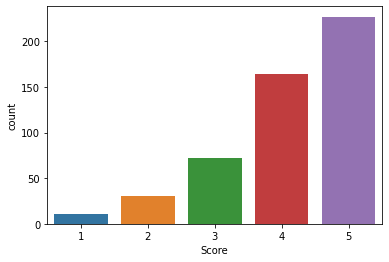

In [14]:
sns.countplot(x='Score',data=data)

In [15]:
for i in sorted(data['Score'].unique()):
    print('There are {0} users rating {1}'.format(data[data['Score']==i].shape[0],i))

There are 11 users rating 1
There are 30 users rating 2
There are 72 users rating 3
There are 164 users rating 4
There are 227 users rating 5


Most users give 4 or 5 in score. Not surprised, it is Vegas
As most users give 4 or 5, I am curious those records with score only 1 to 3. We can see if there is any particular reason causing such low score

In [16]:
data_lr=data[data['Score'].isin([1,2,3])]


In [17]:
data_lr.shape

(113, 19)

In [18]:
data_lr.groupby('Hotel name')['Hotel name'].count().sort_values(ascending=False)

Hotel name
Circus Circus Hotel & Casino Las Vegas                 13
Monte Carlo Resort&Casino                              12
Excalibur Hotel & Casino                               10
Hilton Grand Vacations at the Flamingo                  8
Tuscany Las Vegas Suites & Casino                       7
The Westin las Vegas Hotel Casino & Spa                 7
Treasure Island- TI Hotel & Casino                      6
The Cromwell                                            6
Paris Las Vegas                                         6
Caesars Palace                                          5
Tropicana Las Vegas - A Double Tree by Hilton Hotel     5
The Cosmopolitan Las Vegas                              4
Hilton Grand Vacations on the Boulevard                 4
Bellagio Las Vegas                                      4
The Palazzo Resort Hotel Casino                         4
Wyndham Grand Desert                                    3
Trump International Hotel Las Vegas                     3
Enc

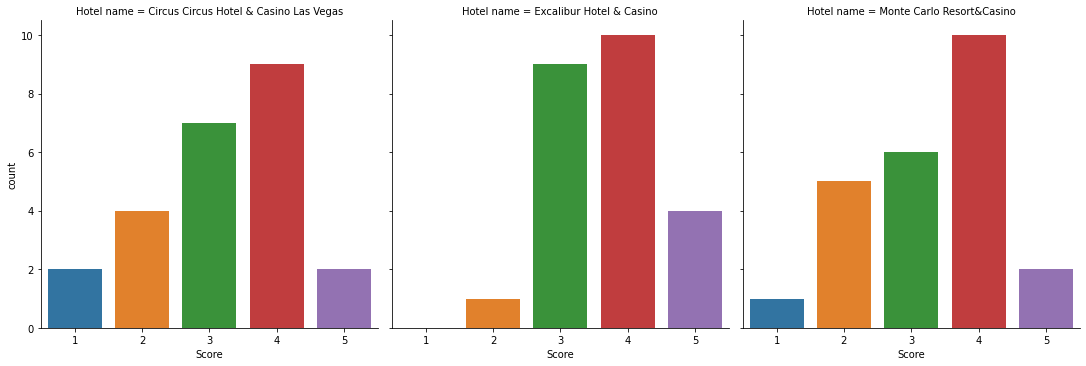

In [19]:
low_score_hotel=['Circus Circus Hotel & Casino Las Vegas','Monte Carlo Resort&Casino','Excalibur Hotel & Casino']
sns.catplot(x='Score',col='Hotel name',data=data[data['Hotel name'].isin(low_score_hotel)],kind='count')

In [20]:
for i in low_score_hotel:
    for j in sorted(data['Score'].unique()):
        print('In {0}, there are {1} users rating {2}'.format(i,data[(data['Score']==j) & (data['Hotel name']==i)].shape[0],j))
    print()

In Circus Circus Hotel & Casino Las Vegas, there are 2 users rating 1
In Circus Circus Hotel & Casino Las Vegas, there are 4 users rating 2
In Circus Circus Hotel & Casino Las Vegas, there are 7 users rating 3
In Circus Circus Hotel & Casino Las Vegas, there are 9 users rating 4
In Circus Circus Hotel & Casino Las Vegas, there are 2 users rating 5

In Monte Carlo Resort&Casino, there are 1 users rating 1
In Monte Carlo Resort&Casino, there are 5 users rating 2
In Monte Carlo Resort&Casino, there are 6 users rating 3
In Monte Carlo Resort&Casino, there are 10 users rating 4
In Monte Carlo Resort&Casino, there are 2 users rating 5

In Excalibur Hotel & Casino, there are 0 users rating 1
In Excalibur Hotel & Casino, there are 1 users rating 2
In Excalibur Hotel & Casino, there are 9 users rating 3
In Excalibur Hotel & Casino, there are 10 users rating 4
In Excalibur Hotel & Casino, there are 4 users rating 5



Appearantly for these three hotels, around half of users give 1,2 or 3 and half give 4 and 5. Seem the low rating of hotel is not across all users. Need further investigation on cause of low rating

Second question relating score is about hotel star. Does a hotel with a higher star impress uesr more than a hotel with a lower star?

<AxesSubplot:xlabel='Hotel stars', ylabel='Score'>

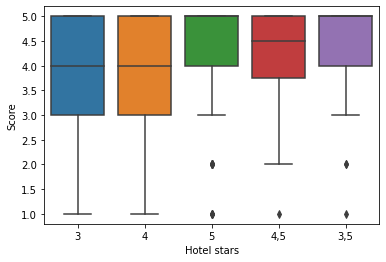

In [21]:
sns.boxplot(x='Hotel stars',y='Score',data=data)

Another possible angle is regarding to facilities. In dataset, there are six variables about facilities, Pool,Gym,Tennis court ,Spa,Casino and Free internet. Let's have a look on whether providing these facilities can boost users' satisfication.

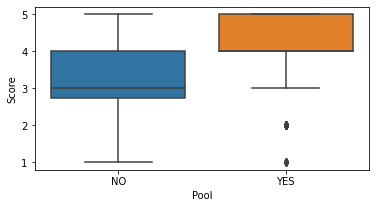

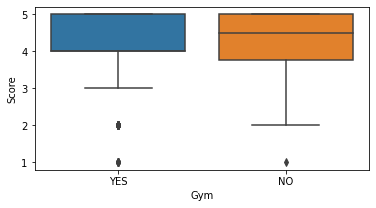

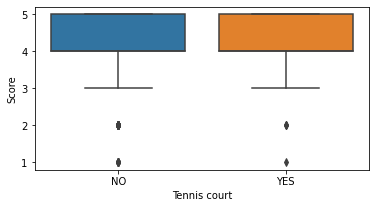

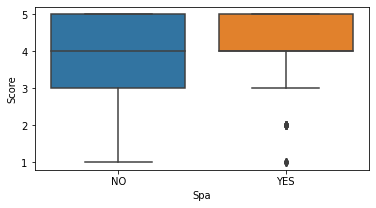

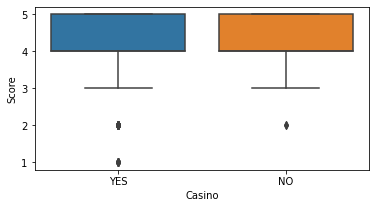

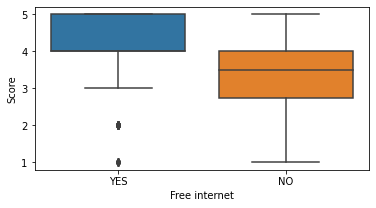

In [22]:
facilities_list=['Pool','Gym','Tennis court','Spa','Casino','Free internet']
for i in facilities_list:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=i,y='Score',data=data)
    plt.show()


Dataset also contains users' purpose of staying. We can also see if there is any correlation with their rating

<AxesSubplot:xlabel='Traveler type', ylabel='Score'>

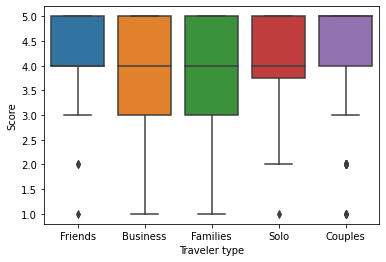

In [23]:
sns.boxplot(x='Traveler type',y='Score',data=data)

Now back to users' country, see if any visitors from particular country will give higher score

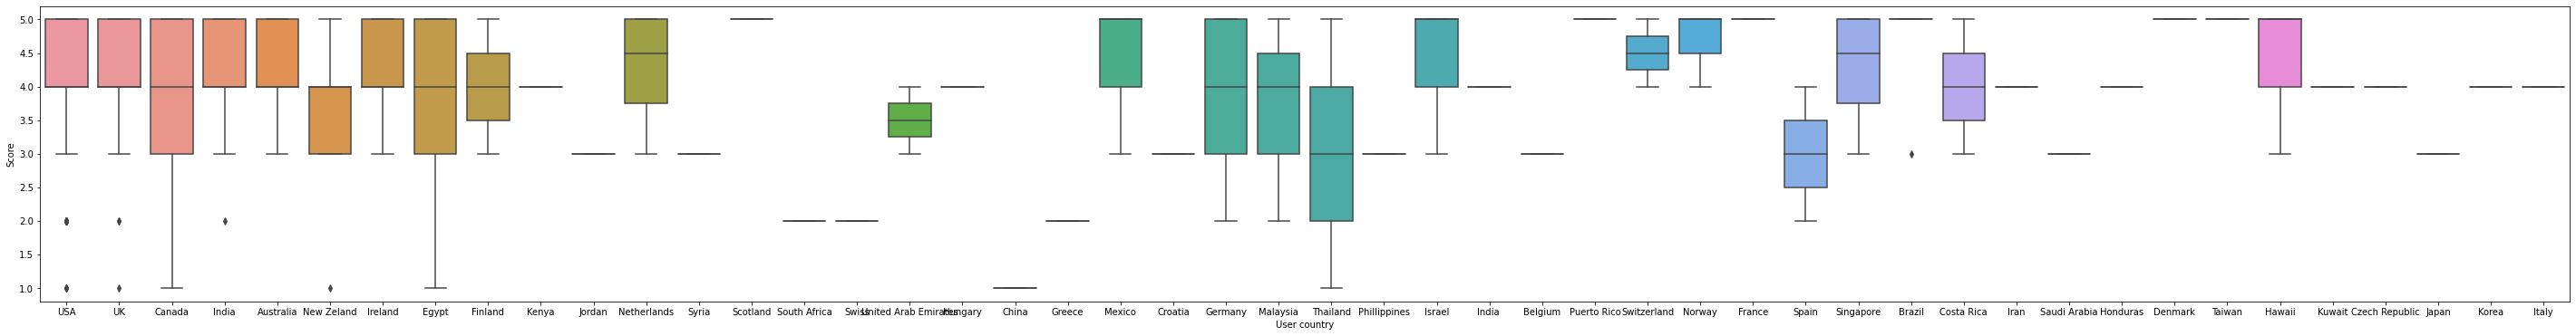

In [24]:
plt.figure(figsize=(50,6))
sns.boxplot(x='User country',y='Score',data=data)
plt.show()

One more analysis is about user's number of view and hotel review. Maybe more frequent users will give better or lower rating

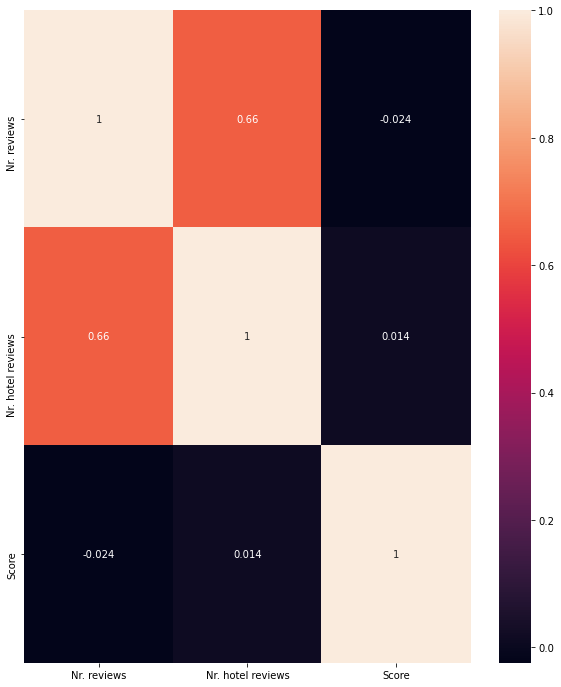

In [25]:
plt.figure(figsize=(10,12))
sns.heatmap(data[['Nr. reviews','Nr. hotel reviews','Score']].corr(), annot=True)
plt.show()

In [26]:
## list of categorical variables which need encoding
categorical = list(data.select_dtypes(include=['object']).columns.values)
categorical

['User country',
 'Period of stay',
 'Traveler type',
 'Pool',
 'Gym',
 'Tennis court',
 'Spa',
 'Casino',
 'Free internet',
 'Hotel name',
 'Hotel stars',
 'Review month',
 'Review weekday']

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# seasons in place of months

['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
data['Period of stay'] = data['Period of stay'].map({'Dec-Feb':'winter', 'Mar-May':'spring', 'Jun-Aug' :'summer','Sep-Nov':'autumn'})

for i in range(0, len(categorical)):
  #  data[categorical[i]] = le.fit_transform(data[categorical[i]])
    print(data[categorical[i]].unique())

['USA' 'UK' 'Canada' 'India' 'Australia' 'New Zeland' 'Ireland' 'Egypt'
 'Finland' 'Kenya' 'Jordan' 'Netherlands' 'Syria' 'Scotland'
 'South Africa' 'Swiss' 'United Arab Emirates' 'Hungary' 'China' 'Greece'
 'Mexico' 'Croatia' 'Germany' 'Malaysia' 'Thailand' 'Phillippines'
 'Israel' 'India ' 'Belgium' 'Puerto Rico' 'Switzerland' 'Norway' 'France'
 'Spain' 'Singapore' 'Brazil' 'Costa Rica' 'Iran' 'Saudi Arabia'
 'Honduras' 'Denmark' 'Taiwan' 'Hawaii' 'Kuwait' 'Czech Republic' 'Japan'
 'Korea' 'Italy']
['winter' 'spring' 'summer' 'autumn']
['Friends' 'Business' 'Families' 'Solo' 'Couples']
['NO' 'YES']
['YES' 'NO']
['NO' 'YES']
['NO' 'YES']
['YES' 'NO']
['YES' 'NO']
['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel' 'Caesars Palace'
 'The Cosmopolitan Las Vegas' 'The Palazzo Resort Hotel Casino'
 'Wynn Las Vegas' 'Trump International Hotel Las Vegas' 

In [28]:
#Encoding categorical features with numbers
for i in range(0, len(categorical)):
    data[categorical[i]] = le.fit_transform(data[categorical[i]])
    
data

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,Member years,Review month,Review weekday
0,46,11,4,13,5,3,3,0,1,0,0,1,1,2,0,3773,9,4,4
1,46,119,21,75,3,3,0,0,1,0,0,1,1,2,0,3773,3,4,0
2,46,36,9,25,5,1,2,0,1,0,0,1,1,2,0,3773,2,3,2
3,45,14,7,14,4,1,3,0,1,0,0,1,1,2,0,3773,6,3,0
4,3,5,5,2,4,1,4,0,1,0,0,1,1,2,0,3773,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,45,15,4,8,5,0,1,1,1,0,1,1,1,14,2,826,1,10,3
500,3,50,13,29,4,0,1,1,1,0,1,1,1,14,2,826,8,9,4
501,46,154,23,31,4,0,3,1,1,0,1,1,1,14,2,826,4,9,4
502,46,9,6,5,2,3,2,1,1,0,1,1,1,14,2,826,9,2,6


### Prepare training and testing sets

In [29]:
## prepare train and test labels
from sklearn.model_selection import train_test_split
X= data.drop(['Score'], axis=1) ## remove score label from data
y = data['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(352, 18)
(352,)
(152, 18)
(152,)


### Recursive feature elimination (RFE) to select features by recursively considering smaller and smaller sets of features

Algorithm used
 * Random Forest Classifier
 * Linear SVC(Support Vector Classifier)
 * Decision Tree Classifier
 * Logistic Regression
 ensemble method used:
     * Gradient Boosting Classifier

In [31]:
##Applying random forest classifier on features to class

## Using feature selection pipeline and classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge


rfe = RFE(estimator = Ridge(), n_features_to_select = 12)
rfe.fit(X_train, y_train)
feature_list = pd.DataFrame({'col':list(X_train.columns.values),'sel':list(rfe.support_ *1)})
print("*****Most contributing features in Score*****")

print(feature_list[feature_list.sel==1].col.values)

*****Most contributing features in Score*****
['Period of stay' 'Traveler type' 'Pool' 'Gym' 'Tennis court' 'Spa'
 'Casino' 'Free internet' 'Hotel stars' 'Member years' 'Review month'
 'Review weekday']


In [32]:
## Subset train data based on selected features
X_sel = pd.DataFrame(X_train, columns=(feature_list[feature_list.sel==1].col.values))
X_sel_t = pd.DataFrame(X_test, columns=(feature_list[feature_list.sel==1].col.values))

In [33]:
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
models = { 
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42) ,
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
}

In [35]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average='macro')  
    rec = recall_score(y_true, y_pred, average='macro') 
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, accuracy 
    else: 
        print(pre) 
        print(rec) 
        print(accuracy)

In [36]:
def train_and_eval(models, X,y): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X,y)
        loss(y, model.predict(X)) 
        print('*' * 30)

In [37]:
train_and_eval(models, X_sel, y_train)

SVC :
0.9805252100840336
0.8686513481343476
0.9573863636363636
******************************
DecisionTreeClassifier :
0.19001796504981217
0.2421194130166909
0.4630681818181818
******************************
GradientBoostingClassifier :
0.3007917240055461
0.27799277156210295
0.45738636363636365
******************************


E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV 
 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVR(),param_grid, refit = True, verbose = 3) 
  
grid.fit(X_sel, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.003, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.021, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.045, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.028, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[CV] ........ C=10, gamma=0.1, kernel=rbf, score=-0.470, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........ C=10, gamma=0.1, kernel=rbf, score=-0.369, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........ C=10, gamma=0.1, kernel=rbf, score=-0.629, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.272, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.214, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.155, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ....... C=10, gamma=0.01, kernel=rbf, score=-0.019, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] .... C=1000, gamma=0.001, kernel=rbf, score=-0.028, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .... C=1000, gamma=0.001, kernel=rbf, score=-0.111, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.001, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.073, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.130, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.059, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ... C=1000, gamma=0.0001, kernel=rbf, score=-0.066, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.7s finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
grid.best_estimator_

SVR(C=10, gamma=0.0001)

In [43]:
svr = SVR(C=10, gamma=0.0001, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [44]:
calculated_metrics(y_test, svr_pred) 

MSE:-  1.1717504529827538
RMSE:-  1.0824742273988577
r2_score:-  -0.14634664912404927


In [42]:
from sklearn.metrics import mean_squared_error, r2_score
def calculated_metrics(y_test, svr_pred): 
    mse = mean_squared_error(y_test, svr_pred) 
    rmse = np.sqrt(mse) 
    r2_scores = r2_score(y_test, svr_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("r2_score:- ", r2_scores)     

Using selected features to fit the model for Score prediction

       Using random forest classifier to predict the score

Using Random forest

In [45]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_sel, y_train)


RandomForestClassifier(max_depth=5, random_state=0)

In [46]:
clf_pred = clf.predict(X_sel_t)

In [47]:
calculated_metrics(y_test, clf_pred) 

MSE:-  1.486842105263158
RMSE:-  1.2193613513897994
r2_score:-  -0.45460704607046076


In [48]:
clf.score(X_sel_t,y_test)

0.48026315789473684

from the above analysis it is found that SVC performed with better accuracy of 95%

In [49]:
from sklearn.svm import SVC

models = { 
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True)
                }
    

In [50]:
models

{'SVC': SVC(gamma=0.5, probability=True)}

In [51]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average='macro')  
    rec = recall_score(y_true, y_pred, average='macro') 
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, accuracy 
    else: 
        print(pre) 
        print(rec) 
        print(accuracy)

In [52]:

def train_and_eval(models, X,y): 
    model=models['SVC']
    clf_= model.fit(X,y)
    loss(y, model.predict(X)) 
    print('*' * 30)
    
    return clf_    
    
    
    

In [53]:
clf_=train_and_eval(models, X_sel, y_train)

0.9805252100840336
0.8686513481343476
0.9573863636363636
******************************


In [54]:
clf_

SVC(gamma=0.5, probability=True)

In [55]:
import joblib
joblib.dump(clf_, 'model.pkl')
ridge_from_joblib = joblib.load('model.pkl')

In [56]:
clf_.predict(X_sel_t)

array([3, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5, 5,
       5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5],
      dtype=int64)

In [57]:
y_test

173    5
274    5
489    4
72     3
305    5
      ..
440    3
23     2
225    5
432    4
446    4
Name: Score, Length: 152, dtype: int64

In [58]:
X_sel_t

,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel stars,Member years,Review month,Review weekday
173,1,2,1,1,0,1,1,1,4,8,7,0
274,2,1,1,1,0,1,1,1,4,2,6,2
489,1,1,1,1,0,1,1,1,2,3,8,5
72,3,0,1,1,1,1,1,1,2,6,4,3
305,0,4,1,1,0,1,1,1,1,2,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...
440,1,3,1,1,0,1,1,1,4,3,8,0
23,3,1,0,1,0,0,1,1,0,5,2,3
225,1,2,1,1,0,1,1,1,4,7,8,3
432,3,4,1,1,0,1,1,1,4,3,4,2


In [59]:
X_sel

,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel stars,Member years,Review month,Review weekday
5,1,1,0,1,0,0,1,1,0,2,7,5
116,0,4,1,1,1,1,1,1,2,1,9,3
45,0,3,1,1,0,1,1,1,0,1,9,3
16,0,2,0,1,0,0,1,1,0,4,11,6
493,2,1,1,1,0,1,1,1,2,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,2,0,1,1,1,1,1,1,2,3,6,5
270,1,2,1,1,0,1,1,1,4,7,0,1
348,2,1,1,1,1,1,1,1,0,5,5,6
435,3,0,1,1,0,1,1,1,4,1,3,0


In [60]:
y_train

5      3
116    4
45     4
16     1
493    5
      ..
106    4
270    3
348    5
435    5
102    5
Name: Score, Length: 352, dtype: int64

In [61]:
clf_.predict(X_sel)

array([3, 4, 4, 1, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 5, 5, 4, 5, 3, 2, 3, 4, 3, 4, 5, 5,
       5, 4, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 1, 5, 5, 5, 3,
       4, 3, 5, 4, 4, 2, 2, 4, 5, 5, 3, 2, 5, 4, 4, 5, 4, 4, 4, 4, 3, 5,
       5, 4, 5, 5, 3, 5, 2, 5, 4, 4, 4, 4, 5, 5, 5, 3, 5, 5, 4, 5, 5, 4,
       2, 5, 4, 4, 4, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 3, 5, 3, 5, 5,
       4, 5, 5, 5, 5, 3, 4, 5, 3, 5, 3, 5, 1, 3, 5, 5, 4, 5, 5, 5, 5, 5,
       5, 4, 3, 5, 5, 5, 4, 4, 4, 5, 4, 5, 5, 4, 5, 5, 3, 5, 4, 5, 4, 4,
       4, 5, 5, 5, 4, 2, 3, 5, 5, 4, 4, 5, 3, 5, 4, 3, 5, 5, 4, 3, 2, 5,
       5, 5, 5, 4, 4, 5, 5, 4, 5, 4, 5, 5, 4, 3, 5, 5, 3, 3, 3, 5, 5, 3,
       5, 3, 4, 5, 3, 5, 5, 5, 5, 2, 4, 5, 4, 4, 5, 3, 3, 4, 3, 1, 3, 4,
       3, 4, 5, 5, 5, 4, 5, 2, 5, 5, 4, 5, 5, 4, 4, 5, 3, 4, 5, 5, 4, 5,
       4, 5, 4, 5, 3, 4, 4, 3, 4, 4, 4, 5, 3, 5, 4, 5, 4, 4, 3, 3, 5, 5,
       3, 3, 1, 4, 3, 5, 3, 5, 5, 5, 5, 5, 5, 2, 5,

In [62]:
clf_.predict([[1,1,0,1,0,0,1,1,0,2,7,5]])

array([3], dtype=int64)

In [63]:
clf_.predict([[1,4,1,1,0,1,1,1,4,8,7,0]])

array([5], dtype=int64)

In [67]:
np.where(np.isnan(y_train))


(array([], dtype=int64),)